In [44]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


poke = pd.read_csv('pokedex_limpa.csv')

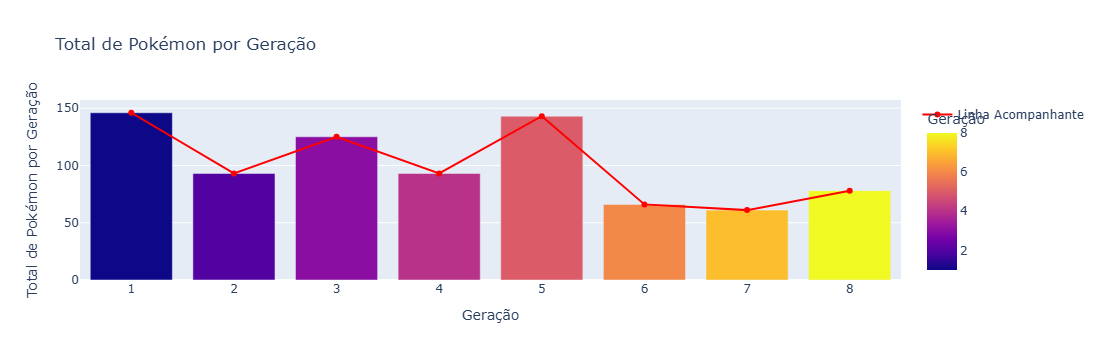

In [18]:
# Agrupando por geração e contando a quantidade de pokemons por geração
poke_generation = poke.groupby('generation').agg({
    'name':'count'
}).reset_index()

# Criando o gráfico
fig = px.bar(poke_generation, x='generation', y='name', title='Total de Pokémon por Geração', color='generation',
            labels={
                'generation':'Geração',
                'name':'Total de Pokémon por Geração'
            })

# Adiconando a linha para seguir o topo das barras
fig.add_scatter(x=poke_generation['generation'], y=poke_generation['name'], 
                 mode='lines+markers', name='Linha Acompanhante', 
                 line=dict(color='red', width=2))

fig.show()

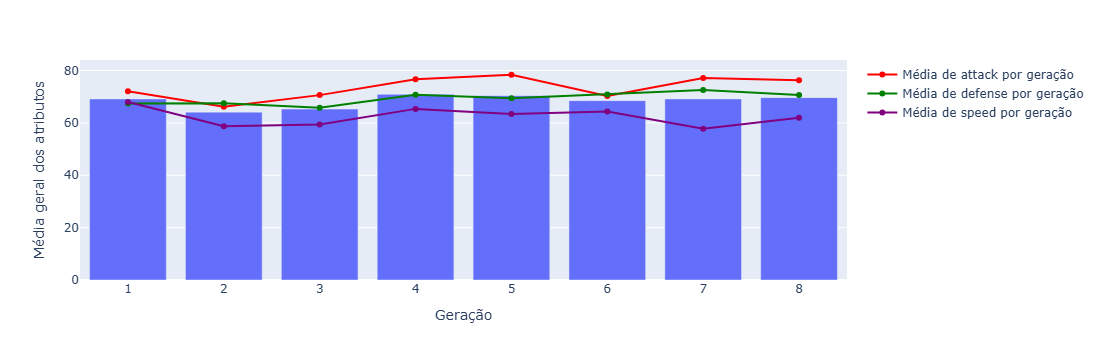

In [19]:
# Agrupando os pkemons pela geração e fazendo a média dos seus atributos
poke_status = poke.groupby('generation').agg({
    'attack':'mean',
    'defense':'mean',
    'speed':'mean'
}).reset_index()

# Criando uma nova coluna tendo a média geral dos pokemons de cada geração
poke_status['mean_total'] = poke_status[['attack', 'defense', 'speed']].mean(axis=1)

# Criando o gráfico
fig = px.bar(poke_status, x='generation',y='mean_total',
            labels={
             'mean_total':'Média geral dos atributos',
             'generation':'Geração'
            })

# Adicionando as linhas das médias
fig.add_scatter(x=poke_status['generation'], y=poke_status['attack'], 
                 mode='lines+markers', name='Média de attack por geração', 
                 line=dict(color='red', width=2))

fig.add_scatter(x=poke_status['generation'], y=poke_status['defense'], 
                 mode='lines+markers', name='Média de defense por geração', 
                 line=dict(color='green', width=2))

fig.add_scatter(x=poke_status['generation'], y=poke_status['speed'], 
                 mode='lines+markers', name='Média de speed por geração', 
                 line=dict(color='purple', width=2))


fig.show()

 Os jogos de pokemons costumam ser balanceados, podemos notar isso na média total dos atributos entre as gerações que não variam muito. Porém podemos notar que existe uma leve tendencia de aumento da média de attack e defence nass últimas gerações.
 Alguns dos possíveis motivos são: O level desing dos pokemons mudam conforme as gerações, quase sempre acompanhando a história do próprio jogo, como a região em que eles estão e o nível das batalhas da região.
 Um detalhe que se deve notar é que na sexta geração ouve um declinio na média de attack e um aumento dos outros atributos. Essa geração é considerada uma das "piores" gerações para os fãs da franquia. Isso pode se dar pelo fato de que o desing dos pokemons serem mais "amigáveis" e menos "Agressivos", detalhe que os fãs não gostaram. porém a franquia tem criado um certo padrão na ditribuição desde então.

In [20]:
attack = poke[['attack','type_1','type_2']].copy()
attack_um_tipo = attack[attack.isnull().any(axis=1)].reset_index(drop=True)
attack_um_tipo

,attack,type_1,type_2
0,52,Fire,NaN
1,64,Fire,NaN
2,48,Water,NaN
3,63,Water,NaN
4,83,Water,NaN
...,...,...,...
410,101,Electric,NaN
411,125,Rock,NaN
412,80,Ice,NaN
413,80,Steel,NaN


In [21]:
attack_dois_tipo = attack.dropna().reset_index(drop=True)
attack_dois_tipo

,attack,type_1,type_2
0,49,Grass,Poison
1,62,Grass,Poison
2,82,Grass,Poison
3,84,Fire,Flying
4,45,Bug,Flying
...,...,...,...
385,90,Water,Ice
386,95,Steel,Dragon
387,60,Dragon,Ghost
388,80,Dragon,Ghost


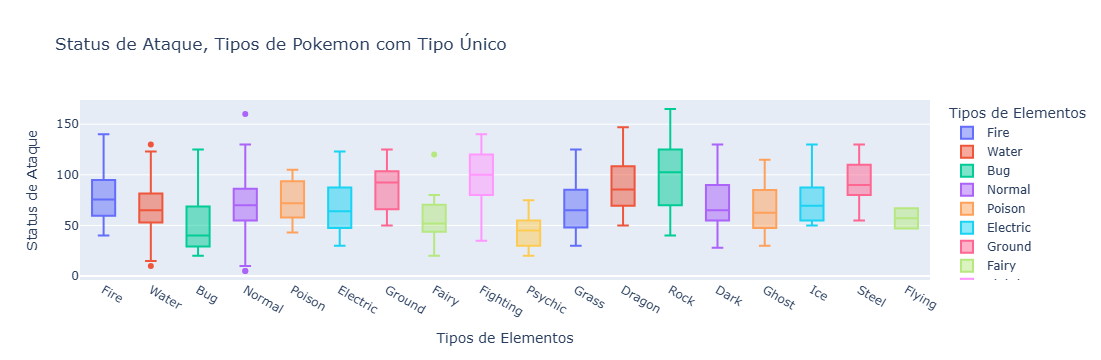

In [22]:
fig = px.box(attack_um_tipo, x='type_1', y='attack', color='type_1', labels={'type_1':'Tipos de Elementos','attack':'Status de Ataque'}, title='Status de Ataque, Tipos de Pokemon com Tipo Único')
fig.show()

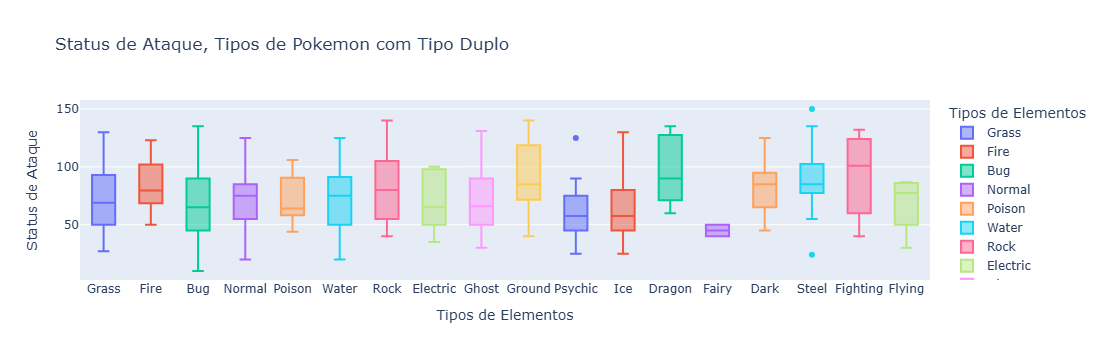

In [23]:
fig = px.box(attack_dois_tipo, x='type_1', y='attack', color='type_1', labels={'type_1':'Tipos de Elementos','attack':'Status de Ataque'}, title='Status de Ataque, Tipos de Pokemon com Tipo Duplo')
fig.show()

In [24]:
defense = poke[['defense','type_1','type_2']].copy()
defense_um_tipo = defense[attack.isnull().any(axis=1)].reset_index(drop=True)
defense_um_tipo

,defense,type_1,type_2
0,43,Fire,NaN
1,58,Fire,NaN
2,65,Water,NaN
3,80,Water,NaN
4,100,Water,NaN
...,...,...,...
410,95,Electric,NaN
411,135,Rock,NaN
412,110,Ice,NaN
413,49,Steel,NaN


In [25]:
defense_dois_tipo = defense.dropna().reset_index(drop=True)
defense_dois_tipo

,defense,type_1,type_2
0,49,Grass,Poison
1,63,Grass,Poison
2,83,Grass,Poison
3,78,Fire,Flying
4,50,Bug,Flying
...,...,...,...
385,100,Water,Ice
386,115,Steel,Dragon
387,30,Dragon,Ghost
388,50,Dragon,Ghost


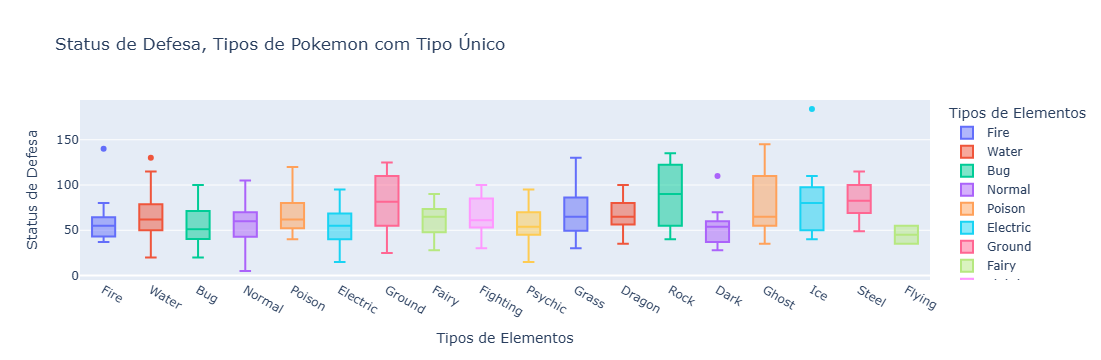

In [26]:
fig = px.box(defense_um_tipo, x='type_1', y='defense', color='type_1', labels={'type_1':'Tipos de Elementos','defense':'Status de Defesa'}, title='Status de Defesa, Tipos de Pokemon com Tipo Único')
fig.show()

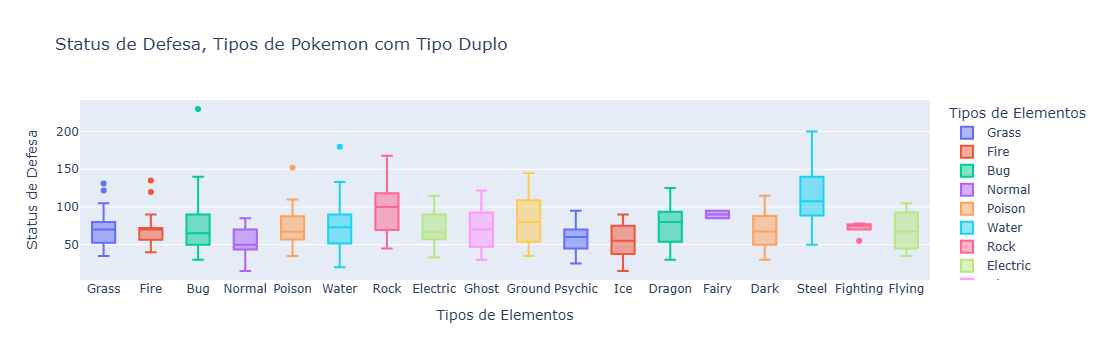

In [27]:
fig = px.box(defense_dois_tipo, x='type_1', y='defense', color='type_1', labels={'type_1':'Tipos de Elementos','defense':'Status de Defesa'}, title='Status de Defesa, Tipos de Pokemon com Tipo Duplo')
fig.show()

In [28]:
speed = poke[['speed','type_1','type_2']].copy()
speed_um_tipo = speed[attack.isnull().any(axis=1)].reset_index(drop=True)
speed_um_tipo


,speed,type_1,type_2
0,65,Fire,NaN
1,80,Fire,NaN
2,43,Water,NaN
3,58,Water,NaN
4,78,Water,NaN
...,...,...,...
410,15,Electric,NaN
411,70,Rock,NaN
412,50,Ice,NaN
413,40,Steel,NaN


In [29]:
speed_dois_tipo = speed.dropna().reset_index(drop=True)
speed_dois_tipo

,speed,type_1,type_2
0,45,Grass,Poison
1,60,Grass,Poison
2,80,Grass,Poison
3,100,Fire,Flying
4,70,Bug,Flying
...,...,...,...
385,55,Water,Ice
386,85,Steel,Dragon
387,82,Dragon,Ghost
388,102,Dragon,Ghost


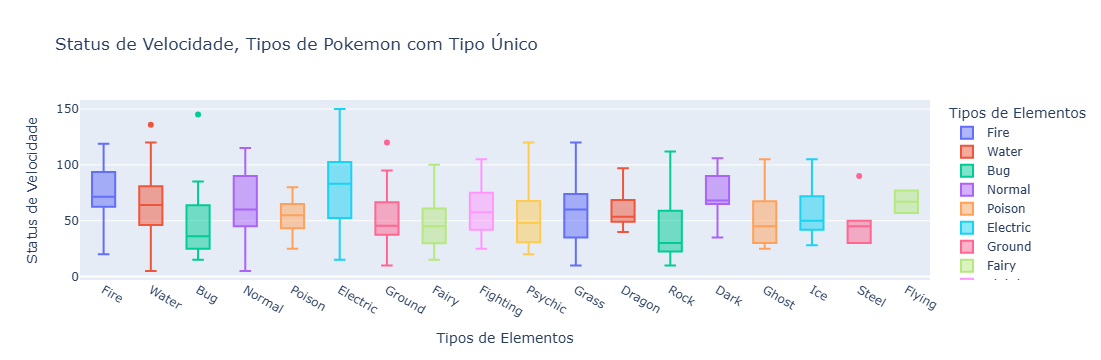

In [30]:
fig = px.box(speed_um_tipo, x='type_1', y='speed', color='type_1', labels={'type_1':'Tipos de Elementos','speed':'Status de Velocidade'}, title='Status de Velocidade, Tipos de Pokemon com Tipo Único')
fig.show()

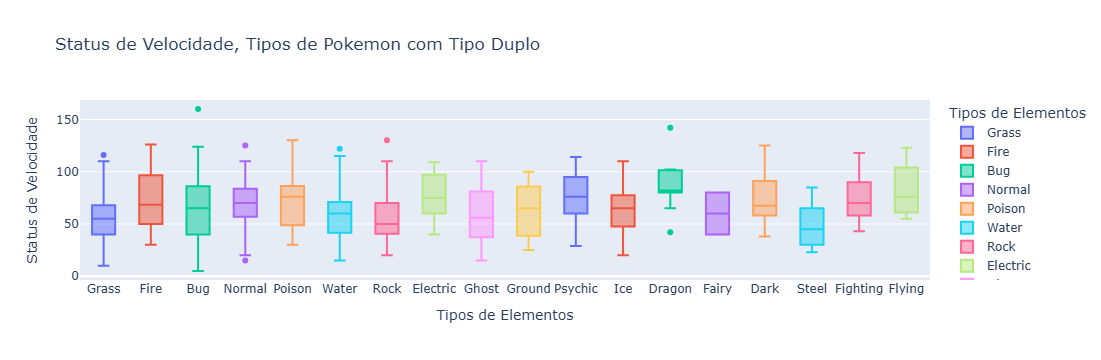

In [31]:
fig = px.box(speed_dois_tipo, x='type_1', y='speed', color='type_1', labels={'type_1':'Tipos de Elementos','speed':'Status de Velocidade'}, title='Status de Velocidade, Tipos de Pokemon com Tipo Duplo')
fig.show()

In [32]:
equilibrado = poke[['attack','speed','defense','type_1','type_2']].copy()
# Selecionando as colunas e calculando a média
equilibrado['media'] = round(equilibrado[['attack', 'speed', 'defense']].mean(axis=1))
equilibrado

,attack,speed,defense,type_1,type_2,media
0,49,45,49,Grass,Poison,48.0
1,62,60,63,Grass,Poison,62.0
2,82,80,83,Grass,Poison,82.0
3,52,65,43,Fire,NaN,53.0
4,64,80,58,Fire,NaN,67.0
...,...,...,...,...,...,...
800,90,55,100,Water,Ice,82.0
801,95,85,115,Steel,Dragon,98.0
802,60,82,30,Dragon,Ghost,57.0
803,80,102,50,Dragon,Ghost,77.0


In [33]:
media = equilibrado[['media','type_1','type_2']].copy()
media_um_tipo = media[attack.isnull().any(axis=1)].reset_index(drop=True)
media_um_tipo

,media,type_1,type_2
0,53.0,Fire,NaN
1,67.0,Fire,NaN
2,52.0,Water,NaN
3,67.0,Water,NaN
4,87.0,Water,NaN
...,...,...,...
410,70.0,Electric,NaN
411,110.0,Rock,NaN
412,80.0,Ice,NaN
413,56.0,Steel,NaN


In [34]:
media_dois_tipo = media.dropna().reset_index(drop=True)
media_dois_tipo

,media,type_1,type_2
0,48.0,Grass,Poison
1,62.0,Grass,Poison
2,82.0,Grass,Poison
3,87.0,Fire,Flying
4,55.0,Bug,Flying
...,...,...,...
385,82.0,Water,Ice
386,98.0,Steel,Dragon
387,57.0,Dragon,Ghost
388,77.0,Dragon,Ghost


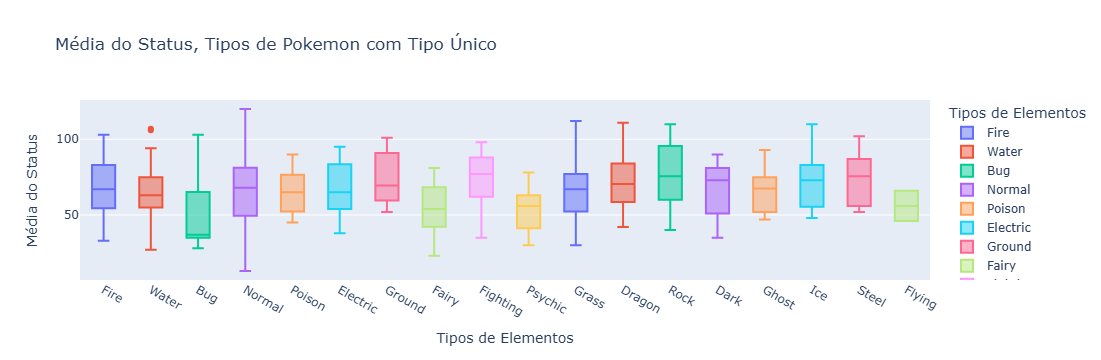

In [35]:
fig = px.box(media_um_tipo, x='type_1', y='media', color='type_1', labels={'type_1':'Tipos de Elementos','media':'Média do Status'}, title='Média do Status, Tipos de Pokemon com Tipo Único')
fig.show()

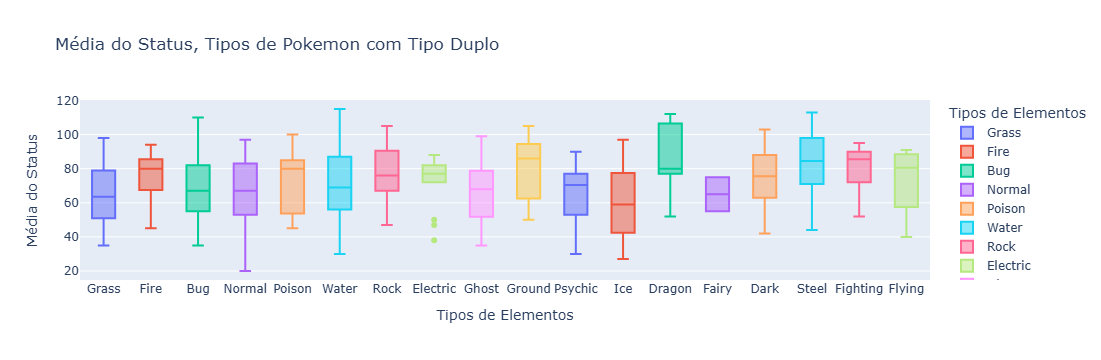

In [36]:
fig = px.box(media_dois_tipo, x='type_1', y='media', color='type_1', labels={'type_1':'Tipos de Elementos','media':'Média do Status'}, title='Média do Status, Tipos de Pokemon com Tipo Duplo')
fig.show()

## Quais tipos tendem a ter os maiores ou menores valores de 'attack', 'defense' e 'speed'? 

### Ataque

Pokémon do tipo Pedra, em sua forma única, e Pokémon do tipo Lutador (seja em forma única ou dupla, com Lutador como tipo principal) tendem a ter os ataques mais poderosos. É comum encontrar Pokémon do tipo Aço entre os mais fortes, independentemente de sua combinação de tipos.

Por outro lado, Pokémon do tipo Inseto (em sua forma única) e Pokémon do tipo Fada (em combinações duplas) geralmente apresentam ataques menos poderosos. Pokémon do tipo Psíquico também costumam ter ataques mais fracos, tanto em sua forma única quanto em combinações duplas.

### Defesa

Pokémon do tipo Pedra e Pokémon do tipo Aço geralmente possuem as defesas mais robustas, seja em sua forma única ou em combinações com outros tipos.

Por outro lado, Pokémon do tipo Voador e Pokémon do tipo Normal tendem a ter defesas mais frágeis. Pokémon do tipo Psíquico frequentemente aparecem entre os tipos com menor defesa, tanto em sua forma única quanto em combinações.

### Velocidade

Pokémon do tipo Elétrico em sua forma única e Pokémon do tipo Dragão geralmente são os mais rápidos. É interessante notar que os tipos que dominam a lista de mais rápidos não se repetem entre as categorias de tipos únicos e duplos.

Por outro lado, Pokémon do tipo Pedra em sua forma única e Pokémon do tipo Aço em combinações duplas costumam ser os mais lentos. É curioso que esses mesmos tipos apareçam entre os mais lentos e também entre os mais defensivos.

### Existe algum tipo que é notavelmente equilibrado ou forte em algum atributo?

Pokémon do tipo Lutador em sua forma única e Pokémon do tipo Chão em combinações duplas geralmente possuem estatísticas mais equilibradas. É interessante notar que Pokémon do tipo Lutador e Pokémon do tipo Aço frequentemente aparecem entre os três tipos com estatísticas mais balanceadas, tanto em sua forma única quanto em combinações.

#### Tipos com Estatísticas Equilibradas
* Lutador: Como você mencionou, Pokémon do tipo Lutador geralmente possuem uma distribuição de estatísticas bastante equilibrada, sendo eficientes tanto em ataques físicos quanto em defesa.

* Aço: Pokémon do tipo Aço também são conhecidos por suas estatísticas equilibradas, combinando boa defesa física e especial com um ataque físico considerável.

#### Tipos com Forças Específicas
* Dragão: Pokémon do tipo Dragão geralmente possuem alto Ataque Especial e Ataque, sendo poderosos em batalhas. No entanto, podem ser vulneráveis a certos tipos.

* Psíquico: Pokémon do tipo Psíquico excelam em Ataque Especial, mas podem ter defesas mais frágeis.

* Fada: Introduzido em gerações mais recentes, o tipo Fada possui alta defesa especial e é super efetivo contra tipos Dragão.

* Elétrico: Pokémon do tipo Elétrico geralmente possuem alta velocidade e ataques especiais poderosos.

## Seleção de Pokémon para a Bolsa:

### Simule a situação na qual você receberá 3 Pokémon de 10 tipos diferentes, selecionados aleatoriamente. Desses 30 Pokémon, você deve automatizar a seleção de 6 Pokémon para a sua bolsa com base em um critério otimizado.

In [37]:
#transforma os tipos únicos em uma lista
unique_types = poke['type_1'].unique().tolist()

#função que pega o dataframe, a coluna tipo e seleciona um pedaço daquele dataframe baseado no parâmetro
def generate_pokemon(df, type, quantity):
  pokemon_type = df[df['type_1'] == type]

  selected_pokemons = pokemon_type.sample(n=quantity)

  return selected_pokemons

selected_pokemons_final = []

for type in unique_types[:10]:
  selected_pokemons = generate_pokemon(poke, type, 3)
  selected_pokemons_final.append(selected_pokemons)

df_result = pd.concat(selected_pokemons_final, ignore_index=True)
df_result = df_result.drop(columns=['Unnamed: 0'])

### Para isso, utilize uma métrica ponderada que leve em consideração os atributos attack, defense, speed e as colunas de against, aplicando pesos customizados para cada critério. Além disso, a equipe final deve conter tipos variados, sem repetição de tipos.

In [38]:
attack = df_result['attack'].tolist()
defense = df_result['defense'].tolist()
speed = df_result['speed'].tolist()

attack_weight = 0.40
defense_weight = 0.30
speed_weight = 0.30

new_attack = [num * attack_weight for num in attack]
new_defense = [num * defense_weight for num in defense]
new_speed = [num * speed_weight for num in speed]

test = df_result
test['pondered_attack'] = new_attack
test['pondered_defense'] = new_defense
test['pondered_speed'] = new_speed
test.describe()

,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,...,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,pondered_attack,pondered_defense,pondered_speed
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,385.166667,3.733333,1.333333,0.773333,30.110000,2.500000,376.600000,62.200000,71.700000,61.200000,...,0.775000,1.291667,0.883333,0.850000,0.866667,1.000000,0.966667,28.680000,18.360000,19.980000
std,269.723496,2.420221,0.479463,0.425833,40.402879,0.508548,107.881992,14.928335,28.197762,23.792784,...,0.349569,0.771483,0.313031,0.351107,0.224888,0.454859,0.345746,11.279105,7.137835,11.077638
min,28.000000,1.000000,1.000000,0.100000,0.100000,2.000000,195.000000,35.000000,22.000000,28.000000,...,0.250000,0.250000,0.000000,0.000000,0.500000,0.500000,0.500000,8.800000,8.400000,4.500000
25%,176.750000,2.000000,1.000000,0.500000,6.600000,2.000000,300.750000,50.000000,51.250000,45.000000,...,0.500000,1.000000,1.000000,1.000000,0.625000,0.625000,1.000000,20.500000,13.500000,9.825000
50%,340.500000,3.500000,1.000000,0.750000,17.150000,2.500000,385.000000,64.500000,75.000000,57.000000,...,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,17.100000,17.550000
75%,623.250000,5.750000,2.000000,1.000000,30.000000,3.000000,477.750000,70.000000,90.000000,67.750000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,20.325000,27.900000
max,883.000000,8.000000,2.000000,2.000000,175.000000,3.000000,525.000000,90.000000,120.000000,120.000000,...,2.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,48.000000,36.000000,48.000000


In [39]:
test['pondered_values'] = (test['pondered_attack'] + test['pondered_defense'] + test['pondered_speed']) / 100
q3 = test['pondered_values'].quantile(0.75)
test_pondered = test[(test['pondered_values']> q3 )]
test_pondered = test_pondered.drop_duplicates(subset=['type_1'])
choosen_pokemon = test_pondered.head(6)
choosen_pokemon

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,pondered_attack,pondered_defense,pondered_speed,pondered_values
11,291,Ninjask,3,Normal,Ninja Pokémon,2,Bug,Flying,0.8,12.0,...,4.00,1.0,1.0,1.0,1.0,1.0,36.0,13.5,48.0,0.975
14,398,Staraptor,4,Normal,Predator Pokémon,2,Normal,Flying,1.2,24.9,...,2.00,0.0,1.0,1.0,1.0,1.0,48.0,21.0,30.0,0.990
16,452,Drapion,4,Normal,Ogre Scorp Pokémon,2,Poison,Dark,1.3,61.5,...,1.00,0.5,1.0,0.5,1.0,1.0,36.0,33.0,28.5,0.975
20,836,Boltund,8,Normal,Dog Pokémon,1,Electric,NaN,1.0,34.0,...,1.00,1.0,1.0,1.0,0.5,1.0,36.0,18.0,36.3,0.903
21,28,Sandslash,1,Normal,Mouse Pokémon,1,Ground,NaN,1.0,29.5,...,0.50,1.0,1.0,1.0,1.0,1.0,40.0,33.0,19.5,0.925
27,448,Lucario,4,Normal,Aura Pokémon,2,Fighting,Steel,1.2,54.0,...,0.25,1.0,0.5,0.5,0.5,1.0,44.0,21.0,27.0,0.920


### Crie um gráfico de dispersão 3D para visualizar attack, defense e speed dos Pokémon selecionados.

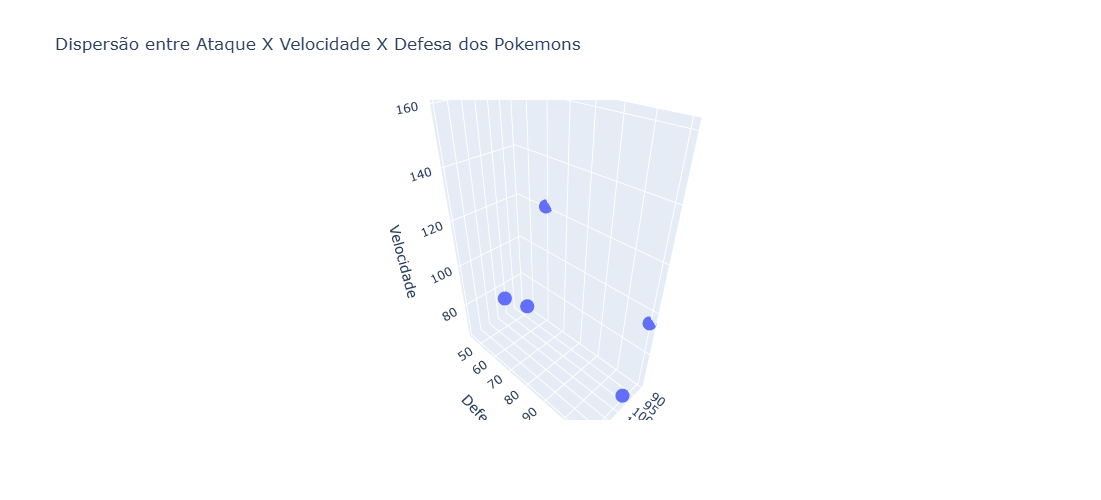

In [40]:
fig = px.scatter_3d(choosen_pokemon, x='attack', y='defense', z='speed', height=500, title='Dispersão entre Ataque X Velocidade X Defesa dos Pokemons' ,labels={
  'speed': 'Velocidade',
  'attack': 'Ataque',
  'defense': 'Defesa'
})
fig.show()

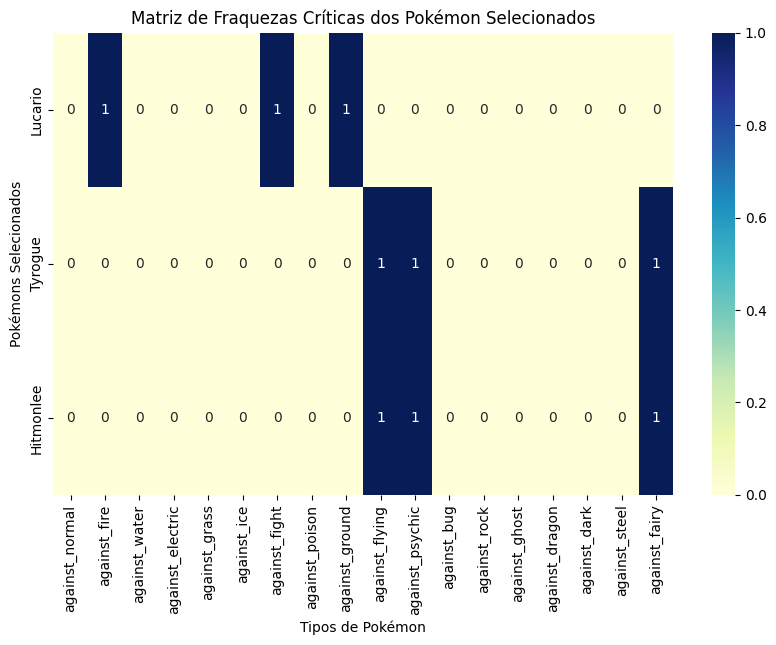

In [46]:
#Selecionando as colunas 'against_*' para os 6 Pokémon selecionados
selectedpokemons = poke.iloc[choosen_pokemon.index]  # Usando o índice dos 6 Pokémon escolhidos
against_columns = [col for col in poke.columns if col.startswith('against')]

#Calculando as fraquezas para os 6 Pokémon selecionados
weaknesses = selected_pokemons[against_columns].apply(lambda x: x > 1).astype(int)

#Criando a matriz de calor (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(weaknesses, annot=True, cmap='YlGnBu', xticklabels=against_columns, yticklabels=selected_pokemons['name'], cbar=True)

#Adicionando título e rótulos
plt.title("Matriz de Fraquezas Críticas dos Pokémon Selecionados")
plt.xlabel("Tipos de Pokémon")
plt.ylabel("Pokémons Selecionados")
plt.show()